In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
gz2_catalog = pd.read_csv("../../BigData/gz2_hart16.csv") # download from https://gz2hart.s3.amazonaws.com/gz2_hart16.csv.gz

In [3]:
gz2_catalog.describe()

,dr7objid,ra,dec,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,t01_smooth_or_features_a01_smooth_weight,t01_smooth_or_features_a01_smooth_fraction,t01_smooth_or_features_a01_smooth_weighted_fraction,t01_smooth_or_features_a01_smooth_debiased,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
count,2.396950e+05,239695.000000,239695.000000,239695.000000,239695.000000,239695.000000,239695.000000,239695.000000,239695.000000,239695.000000,...,239695.000000,239695.000000,239695.000000,239695.000000,239695.000000,239695.000000,239695.000000,239695.00000,239695.000000,239695.000000
mean,5.878182e+17,185.348053,26.077803,42.569745,179.024565,27.609679,27.483195,0.639344,0.645559,0.397942,...,0.017008,0.016616,0.025175,0.009954,1.750203,1.747810,0.263493,0.26239,0.250457,0.140570
std,1.827461e+14,47.905084,18.209517,5.856933,60.729097,13.261534,13.243674,0.284853,0.288195,0.346484,...,0.098695,0.096988,0.121978,0.099274,3.266551,3.264901,0.364091,0.36351,0.356535,0.347578
min,5.877230e+17,0.006464,-3.743851,16.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5.877327e+17,154.106384,10.665661,39.000000,140.000000,18.000000,18.000000,0.455000,0.459000,0.040000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,5.877393e+17,185.964218,24.761133,43.000000,156.000000,32.000000,32.000000,0.760000,0.768000,0.326000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,5.877429e+17,219.843925,39.732906,46.000000,196.000000,38.000000,38.000000,0.863000,0.871000,0.776000,...,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.500000,0.50000,0.434294,0.000000
max,5.888489e+17,359.988831,70.133217,79.000000,604.000000,68.000000,66.280998,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,33.000000,33.000000,1.000000,1.00000,1.000000,1.000000


In [4]:
classification_columns = [i for i in list(gz2_catalog.columns) if i[0]=="t"]
mapping_columns = [i for i in list(gz2_catalog.columns) if i[0]!="t"]

In [5]:
mapping_columns

['dr7objid', 'ra', 'dec', 'rastring', 'decstring', 'sample', 'gz2_class']

In [6]:
classification_columns

['total_classifications',
 'total_votes',
 't01_smooth_or_features_a01_smooth_count',
 't01_smooth_or_features_a01_smooth_weight',
 't01_smooth_or_features_a01_smooth_fraction',
 't01_smooth_or_features_a01_smooth_weighted_fraction',
 't01_smooth_or_features_a01_smooth_debiased',
 't01_smooth_or_features_a01_smooth_flag',
 't01_smooth_or_features_a02_features_or_disk_count',
 't01_smooth_or_features_a02_features_or_disk_weight',
 't01_smooth_or_features_a02_features_or_disk_fraction',
 't01_smooth_or_features_a02_features_or_disk_weighted_fraction',
 't01_smooth_or_features_a02_features_or_disk_debiased',
 't01_smooth_or_features_a02_features_or_disk_flag',
 't01_smooth_or_features_a03_star_or_artifact_count',
 't01_smooth_or_features_a03_star_or_artifact_weight',
 't01_smooth_or_features_a03_star_or_artifact_fraction',
 't01_smooth_or_features_a03_star_or_artifact_weighted_fraction',
 't01_smooth_or_features_a03_star_or_artifact_debiased',
 't01_smooth_or_features_a03_star_or_artifact

## Lenses

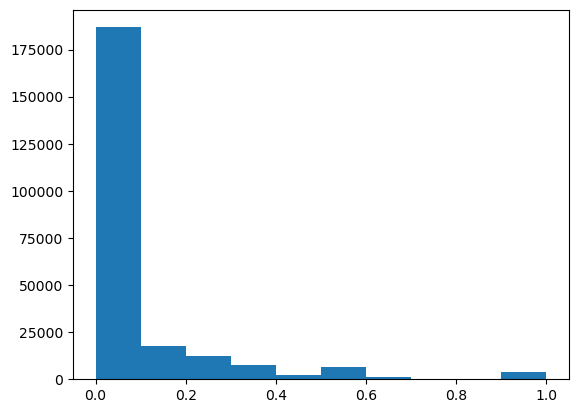

In [7]:
_ = plt.hist(gz2_catalog["t08_odd_feature_a20_lens_or_arc_weighted_fraction"], bins=10)

In [8]:
lens_csv = gz2_catalog[gz2_catalog["t08_odd_feature_a20_lens_or_arc_weighted_fraction"] >=0.8]
lens_csv = lens_csv.drop(classification_columns, axis = 1)

In [9]:
lens_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4356 entries, 16 to 239628
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dr7objid   4356 non-null   int64  
 1   ra         4356 non-null   float64
 2   dec        4356 non-null   float64
 3   rastring   4356 non-null   object 
 4   decstring  4356 non-null   object 
 5   sample     4356 non-null   object 
 6   gz2_class  4356 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 272.2+ KB


In [10]:
lens_csv.to_csv("./reference_csv/lens.csv")

## Spiral Galaxies

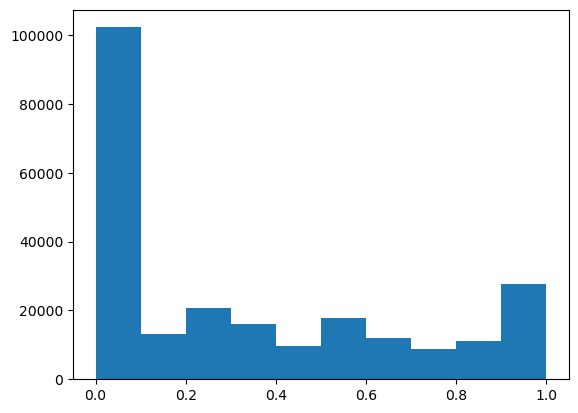

In [11]:
_ = plt.hist(gz2_catalog["t04_spiral_a08_spiral_weighted_fraction"], bins=10)

In [12]:
spiral_csv = gz2_catalog[gz2_catalog["t04_spiral_a08_spiral_weighted_fraction"] >=0.8]
spiral_csv = spiral_csv.drop(classification_columns, axis = 1)

In [13]:
spiral_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38969 entries, 0 to 239652
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dr7objid   38969 non-null  int64  
 1   ra         38969 non-null  float64
 2   dec        38969 non-null  float64
 3   rastring   38969 non-null  object 
 4   decstring  38969 non-null  object 
 5   sample     38969 non-null  object 
 6   gz2_class  38969 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 2.4+ MB


In [14]:
spiral_csv.to_csv("./reference_csv/spiral.csv")

## Ring structures

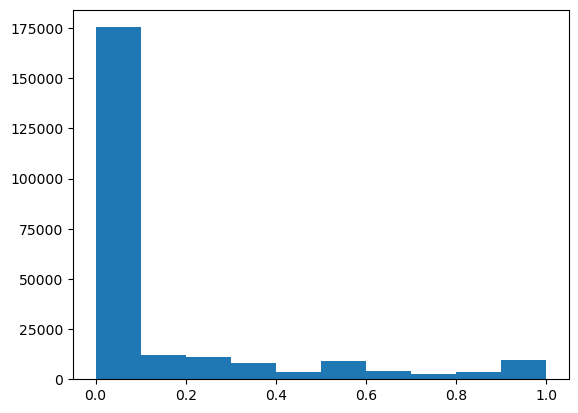

In [15]:
_ = plt.hist(gz2_catalog["t08_odd_feature_a19_ring_weighted_fraction"], bins=10)

In [16]:
ring_csv = gz2_catalog[gz2_catalog["t08_odd_feature_a19_ring_weighted_fraction"] >=0.8]
ring_csv = ring_csv.drop(classification_columns, axis = 1)

In [17]:
ring_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12910 entries, 22 to 239685
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dr7objid   12910 non-null  int64  
 1   ra         12910 non-null  float64
 2   dec        12910 non-null  float64
 3   rastring   12910 non-null  object 
 4   decstring  12910 non-null  object 
 5   sample     12910 non-null  object 
 6   gz2_class  12910 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 806.9+ KB


In [18]:
ring_csv.to_csv("./reference_csv/ring.csv")

## Smooth galaxies

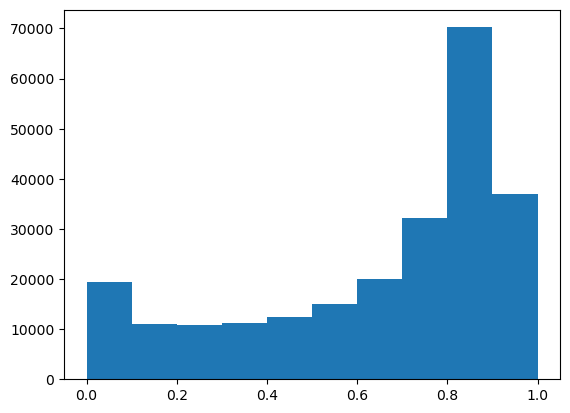

In [19]:
_ = plt.hist(gz2_catalog["t01_smooth_or_features_a01_smooth_weighted_fraction"], bins=10)

In [20]:
smooth_csv = gz2_catalog[gz2_catalog["t01_smooth_or_features_a01_smooth_weighted_fraction"] >=0.8]
smooth_csv = smooth_csv.drop(classification_columns, axis = 1)

In [21]:
smooth_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107313 entries, 5 to 239690
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   dr7objid   107313 non-null  int64  
 1   ra         107313 non-null  float64
 2   dec        107313 non-null  float64
 3   rastring   107313 non-null  object 
 4   decstring  107313 non-null  object 
 5   sample     107313 non-null  object 
 6   gz2_class  107313 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 6.5+ MB


In [22]:
smooth_csv.to_csv("./reference_csv/smooth.csv")

## Companion galaxies

In [ ]:
# Considering "Merger galaxies" to be companion galaxies

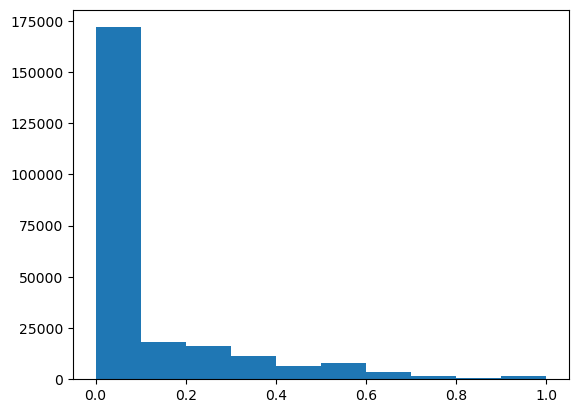

In [23]:
_ = plt.hist(gz2_catalog["t08_odd_feature_a24_merger_weighted_fraction"], bins=10)

In [24]:
companion_csv = gz2_catalog[gz2_catalog["t08_odd_feature_a24_merger_weighted_fraction"] >=0.8]
companion_csv = companion_csv.drop(classification_columns, axis = 1)

In [25]:
companion_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2447 entries, 36 to 239366
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dr7objid   2447 non-null   int64  
 1   ra         2447 non-null   float64
 2   dec        2447 non-null   float64
 3   rastring   2447 non-null   object 
 4   decstring  2447 non-null   object 
 5   sample     2447 non-null   object 
 6   gz2_class  2447 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 152.9+ KB


In [26]:
companion_csv.to_csv("./reference_csv/companion.csv")

## Red Spheroids

In [28]:
# Have to use redMapper git repo to get catalog. For parameters refer : https://arxiv.org/pdf/2501.15679
# For github refer : https://github.com/erykoff/redmapper